# MONET-analysis dev 

First lets just import the driver to see how it happens and so we can play around with it a little 

In [1]:
import driver

/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monetwrf/lib/python3.6/site-packages/pyresample/bilinear/__init__.py:49: UserWarning: XArray and/or zarr not found, XArrayBilinearResampler won't be available.
  warnings.warn("XArray and/or zarr not found, XArrayBilinearResampler won't be available.")


### Driver class

Now lets create an instance of the python driver analysis class. It consists of 4 main parts; model instances, observation instances, a paired instance of both.  This will allow us to move things around the plotting function for spatial and overlays and more complex plots.

In [2]:
an = driver.analysis()

### Control File

set the yaml control file and begin by reading the file

In [3]:
an.control = 'control.yaml'
an.read_control() # control='control.yaml')
an.control_dict

{'analysis': {'start_time': '2019-08-18',
  'end_time': '2019-08-20',
  'plot_grp1': {'plot_type': 'timeseries', 'figure_size': '(12,6)'}},
 'model': {'cmaq_v1': {'files': '/scratch1/BMC/stela/rhs/CMAQ/cmaq_oper/gpfs_prod_aqm/0818/aqm.t12z.aconc_sfc.ncf',
   'mod_type': 'cmaq',
   'variables': {'CO': {'unit_scale': 1000.0, 'unit_scale_method': '*'}},
   'mapping': {'airnow': {'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}},
   'projection': 'None',
   'figure_kwargs': {'color': 'dodgerblue', 'marker': 'x', 'linestyle': '-.'}},
  'cmaq_v2': {'files': '/scratch1/BMC/stela/rhs/CMAQ/cmaq_expt/fv3-cmaq-gbbpex1/0818/aqm.20190818.t12z.aconc-pm25.ncf',
   'mod_type': 'cmaq',
   'variables': {'CO': {'unit_scale': 1000.0, 'unit_scale_method': '*'}},
   'mapping': {'airnow': {'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}},
   'projection': 'None',
   'figure_kwargs': {'color': 'red', 'marker': 'o', 'linestyle': '--'}}},
 'obs': {'airnow': {'use_airnow': True,
   'filename': 'test5.nc',
   'obs_type': 'pt_sfc',
   'ra

### Loading the model data 

driver will automatically loop through the "models" found in the model section of the yaml file and create an instance of the driver.model class for each that includes the label, mapping information, and xarray object as well as the filenames.  Note it can open multiple files easily by including hot keys 

In [4]:
an.open_models()

cmaq_v1
{'files': '/scratch1/BMC/stela/rhs/CMAQ/cmaq_oper/gpfs_prod_aqm/0818/aqm.t12z.aconc_sfc.ncf', 'mod_type': 'cmaq', 'variables': {'CO': {'unit_scale': 1000.0, 'unit_scale_method': '*'}}, 'mapping': {'airnow': {'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}}, 'projection': 'None', 'figure_kwargs': {'color': 'dodgerblue', 'marker': 'x', 'linestyle': '-.'}}
/scratch1/BMC/stela/rhs/CMAQ/cmaq_oper/gpfs_prod_aqm/0818/aqm.t12z.aconc_sfc.ncf


/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monetwrf/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


cmaq_v2
{'files': '/scratch1/BMC/stela/rhs/CMAQ/cmaq_expt/fv3-cmaq-gbbpex1/0818/aqm.20190818.t12z.aconc-pm25.ncf', 'mod_type': 'cmaq', 'variables': {'CO': {'unit_scale': 1000.0, 'unit_scale_method': '*'}}, 'mapping': {'airnow': {'PM25_TOT': 'PM2.5', 'O3': 'OZONE'}}, 'projection': 'None', 'figure_kwargs': {'color': 'red', 'marker': 'o', 'linestyle': '--'}}
/scratch1/BMC/stela/rhs/CMAQ/cmaq_expt/fv3-cmaq-gbbpex1/0818/aqm.20190818.t12z.aconc-pm25.ncf


/scratch2/BMC/rcm1/rhs/anaconda3/envs/py36_monetwrf/lib/python3.6/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()


In [5]:
an.models

{'cmaq_v1': <driver.model at 0x7f239c8f1668>,
 'cmaq_v2': <driver.model at 0x7f23858664a8>}

In [6]:
an.models['cmaq_v1']

In [7]:
an.models['cmaq_v1'].obj.time

<xarray.DataArray 'time' (time: 48)>
array(['2019-08-18T13:00:00.000000000', '2019-08-18T14:00:00.000000000',
       '2019-08-18T15:00:00.000000000', '2019-08-18T16:00:00.000000000',
       '2019-08-18T17:00:00.000000000', '2019-08-18T18:00:00.000000000',
       '2019-08-18T19:00:00.000000000', '2019-08-18T20:00:00.000000000',
       '2019-08-18T21:00:00.000000000', '2019-08-18T22:00:00.000000000',
       '2019-08-18T23:00:00.000000000', '2019-08-19T00:00:00.000000000',
       '2019-08-19T01:00:00.000000000', '2019-08-19T02:00:00.000000000',
       '2019-08-19T03:00:00.000000000', '2019-08-19T04:00:00.000000000',
       '2019-08-19T05:00:00.000000000', '2019-08-19T06:00:00.000000000',
       '2019-08-19T07:00:00.000000000', '2019-08-19T08:00:00.000000000',
       '2019-08-19T09:00:00.000000000', '2019-08-19T10:00:00.000000000',
       '2019-08-19T11:00:00.000000000', '2019-08-19T12:00:00.000000000',
       '2019-08-19T13:00:00.000000000', '2019-08-19T14:00:00.000000000',
       '2019-08-19T15:00:00.000000000', '2019-08-19T16:00:00.000000000',
       '2019-08-19T17:00:00.000000000', '2019-08-19T18:00:00.000000000',
       '2019-08-19T19:00:00.000000000', '2019-08-19T20:00:00.000000000',
       '2019-08-19T21:00:00.000000000', '2019-08-19T22:00:00.000000000',
       '2019-08-19T23:00:00.000000000', '2019-08-20T00:00:00.000000000',
       '2019-08-20T01:00:00.000000000', '2019-08-20T02:00:00.000000000',
       '2019-08-20T03:00:00.000000000', '2019-08-20T04:00:00.000000000',
       '2019-08-20T05:00:00.000000000', '2019-08-20T06:00:00.000000000',
       '2019-08-20T07:00:00.000000000', '2019-08-20T08:00:00.000000000',
       '2019-08-20T09:00:00.000000000', '2019-08-20T10:00:00.000000000',
       '2019-08-20T11:00:00.000000000', '2019-08-20T12:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 2019-08-18T13:00:00 ... 2019-08-20T12:00:00

In [8]:
print(an.start_time)
print(an.end_time)

2019-08-18 00:00:00
2019-08-20 00:00:00


### Open Obs

Now for monet-analysis we will open preprocessed data in either netcdf icartt or some other format.  We will not be retrieving data like monetio does for some observations (ie aeronet, airnow, etc....).  Instead we will provide utitilies to do this so that users can add more data easily.

Like models we list all obs objects in the yaml file and it will loop through and create driver.observation instances that include the model type, file, objects (i.e. data object) and label  

In [9]:
an.open_obs()

In [10]:
an.obs['airnow'].obj.transpose('time','y','x')

<xarray.Dataset>
Dimensions:       (time: 1443, x: 3788, y: 1)
Coordinates:
  * x             (x) int64 0 1 2 3 4 5 6 ... 3781 3782 3783 3784 3785 3786 3787
  * time          (time) datetime64[ns] 2019-08-01 ... 2019-08-21T00:30:00
    latitude      (y, x) float64 ...
    longitude     (y, x) float64 ...
    siteid        (y, x) object ...
Dimensions without coordinates: y
Data variables:
    BARPR         (time, y, x) float64 ...
    BC            (time, y, x) float64 ...
    CO            (time, y, x) float64 ...
    NO            (time, y, x) float64 ...
    NO2           (time, y, x) float64 ...
    NO2Y          (time, y, x) float64 ...
    NOX           (time, y, x) float64 ...
    NOY           (time, y, x) float64 ...
    OZONE         (time, y, x) float64 ...
    PM10          (time, y, x) float64 ...
    PM2.5         (time, y, x) float64 ...
    PRECIP        (time, y, x) float64 ...
    RHUM          (time, y, x) float64 ...
    RWD           (time, y, x) float64 ...
    RWS           (time, y, x) float64 ...
    SO2           (time, y, x) float64 ...
    SRAD          (time, y, x) float64 ...
    TEMP          (time, y, x) float64 ...
    UV-AETH       (time, y, x) float64 ...
    WD            (time, y, x) float64 ...
    WS            (time, y, x) float64 ...
    site          (y, x) object ...
    utcoffset     (y, x) int64 ...
    units         (y, x) object ...
    cmsa_name     (y, x) float64 ...
    msa_code      (y, x) float64 ...
    msa_name      (y, x) object ...
    state_name    (y, x) object ...
    REGION_LABEL  (y, x) object ...
    time_local    (time, y, x) datetime64[ns] ...
Attributes:
    title:         
    format:        NetCDF-4
    date_created:  2021-04-08

In [11]:
an.pair_data()

[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.1s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.2s
[########################################] | 100% Completed |  0.3s
[########################################] | 100% Completed |  0.4s
[########################################] | 100% Completed |  0.5s


In [12]:
print(an.paired)

{'airnow_cmaq_v1': <driver.pair object at 0x7f230b054a58>, 'airnow_cmaq_v2': <driver.pair object at 0x7f230ad350f0>}


In [13]:
an.plotting()


TypeError: ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [26]:
grp_dict = an.control_dict['plots']['plot_grp1']
print(grp_dict['figure_kwargs'])
print(dict(figsize=(12,6)))

{'figsize': '(12,6)'}
{'figsize': (12, 6)}


In [17]:
pairdf = an.paired['airnow_cmaq_v1'].obj.to_dataframe().reset_index(drop=True).dropna(subset=['PM25_TOT'])

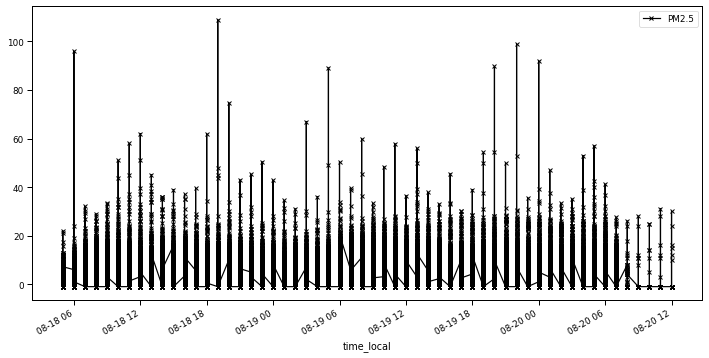

In [23]:
from plots import surfplots as splots
ax = splots.make_timeseries(pairdf, column='PM2.5', label='PM2.5',fig_dict = dict(figsize=(12,6)))